In [1]:
import time
from   matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   sklearn.cluster import DBSCAN, KMeans, MiniBatchKMeans
from   sklearn.datasets import load_digits, make_moons
from   sklearn.linear_model import LogisticRegression
from   sklearn.metrics import silhouette_score
from   sklearn.mixture import GaussianMixture
from   sklearn.model_selection import GridSearchCV, train_test_split
from   sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
CENTERS = [[-3, 3], [-3, 2], [-3, 1], [-1.5, 2], [0, 2]]
SDS     = [0.3, 0.2, 0.3, 0.5, 0.6]
N_EACH = 200

In [3]:
X = pd.DataFrame({
    'x': np.array(
        [np.random.normal(size=N_EACH, loc=CENTERS[i][0], scale=SDS[i])
         for i in range(5)]
    ).reshape(-1),
    'y': np.array(
        [np.random.normal(size=N_EACH, loc=CENTERS[i][1], scale=SDS[i])
         for i in range(5)]
     ).reshape(-1)})
X.head()

,x,y
0,-3.043531,2.730839
1,-3.287184,2.986790
2,-2.928080,2.704035
3,-3.228294,3.248429
4,-3.228019,2.709279


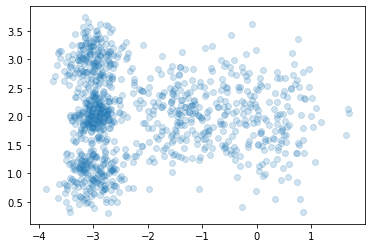

In [4]:
plt.scatter(X.x, X.y, alpha=0.2);

In [5]:
K = 5
start = time.time()
kmeans = KMeans(n_clusters=K, n_init=20)
X['preds1'] = kmeans.fit_predict(X)
print(time.time() - start)

0.09116196632385254


In [6]:
def rand_color():
    vals = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 
            'c', 'd', 'e', 'f']
    return '#' + ''.join(np.random.choice(vals, size=6, replace=True))

rand_color()

'#2e07c9'

In [7]:
def plot_clusters(X, cluster_col):
    for k in range(X[cluster_col].max() + 1):
        plt.scatter(X.loc[X[cluster_col] == k, 'x'], 
                    X.loc[X[cluster_col] == k, 'y'], 
                    color=rand_color(),
                    alpha=0.2);

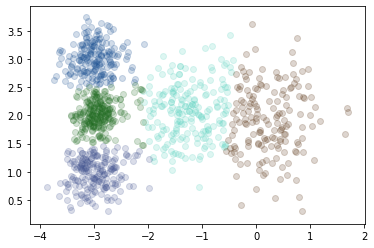

In [8]:
plot_clusters(X, 'preds1')

In [9]:
start = time.time()
minib_kmeans = MiniBatchKMeans(n_clusters=K)
X['preds2'] = minib_kmeans.fit_predict(X)
print(time.time() - start)

0.03125882148742676


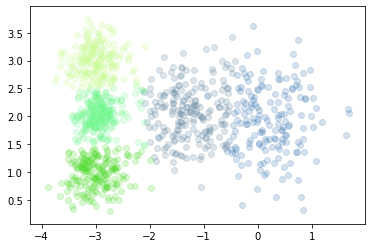

In [10]:
plot_clusters(X, 'preds2')

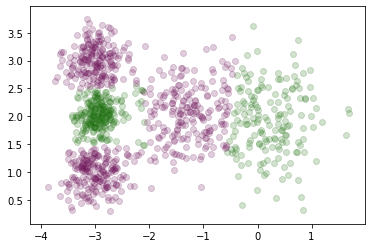

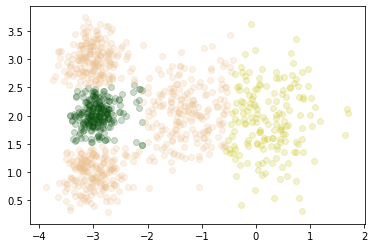

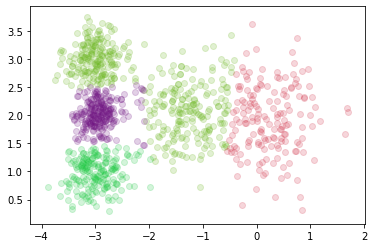

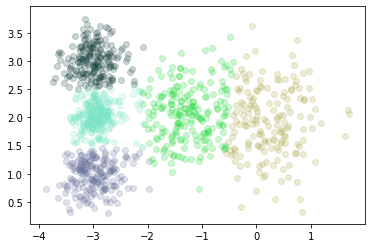

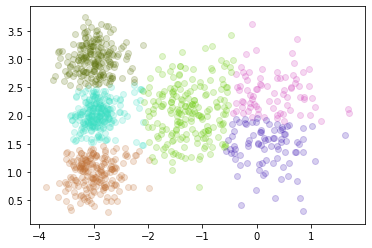

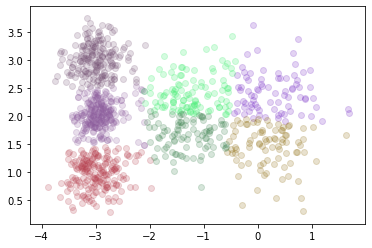

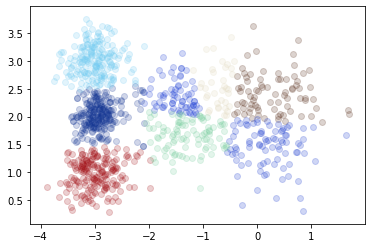

In [11]:
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    X[f'{k}cluster'] = kmeans.fit_predict(X)
    plt.figure()
    plot_clusters(X, f'{k}cluster')

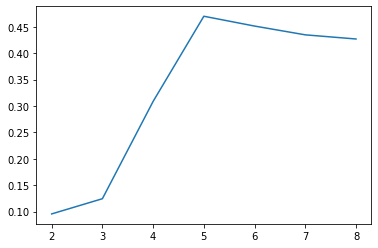

In [12]:
silhouettes = [silhouette_score(X[['x', 'y']], X[f'{k}cluster']) 
               for k in range(2, 9)]
plt.plot(list(range(2, 9)), silhouettes);

# Clustering for image segmentation

In [13]:
IMG = '../../../images'

In [14]:
image = imread(f'{IMG}/parrot.png')
image.shape

(340, 453, 3)

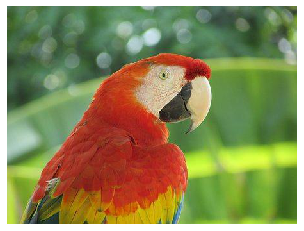

In [15]:
plt.imshow(image)
plt.axis('off');

In [16]:
X = image.reshape(-1, 3)
X.shape

(154020, 3)

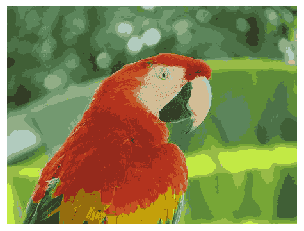

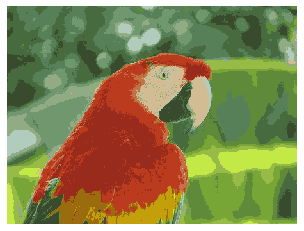

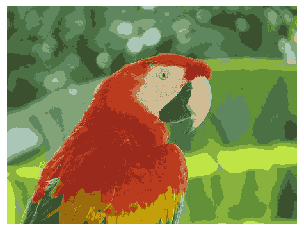

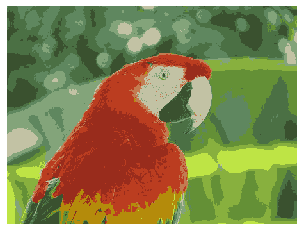

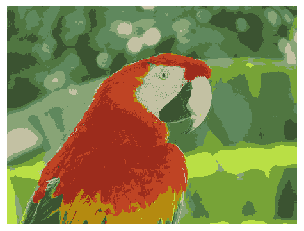

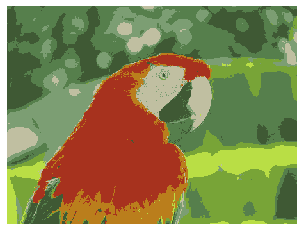

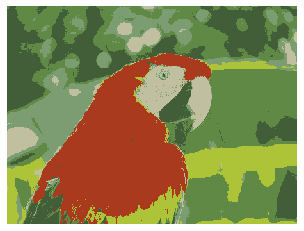

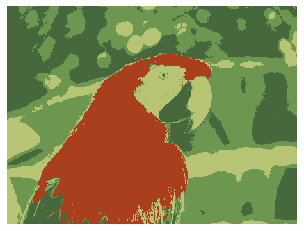

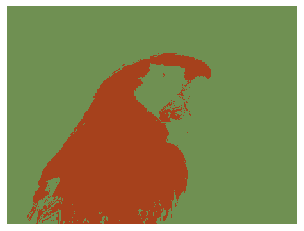

In [17]:
for k in range(18, 1, -2):
    kmeans = KMeans(n_clusters=k).fit(X)
    seg_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)
    plt.figure()
    plt.imshow(seg_img)
    plt.axis('off');

In [18]:
X_digits, y_digits = load_digits(return_X_y=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9622222222222222

In [21]:
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('log_reg', 
     LogisticRegression(
         multi_class='auto', solver='lbfgs', max_iter=500))])
pipeline.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [22]:
pipeline.score(X_test, y_test)

0.9866666666666667

In [36]:
param_grid = {'kmeans__n_clusters': range(2, 100)}
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=0)
grid_clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
    

In [38]:
grid_clf.best_params_

{'kmeans__algorithm': 'auto', 'kmeans__n_clusters': 70}

In [39]:
grid_clf.score(X_test, y_test)

0.9577777777777777

In [40]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
log_reg.score(X_test, y_test)

0.8266666666666667

In [42]:
k = 10
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
repr_digit_idx = np.argmin(X_digits_dist, axis=0)
X_repr_digits = X_train[repr_digit_idx]

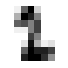

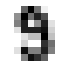

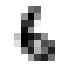

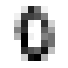

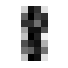

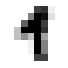

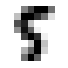

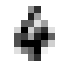

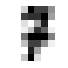

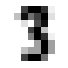

In [43]:
for i in range(k):
    plt.figure(figsize=(1, 1))
    plt.imshow((X_repr_digits[i]*-1 + 16).reshape(8, 8), cmap='gray')
    plt.axis('off')

In [3]:
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [24]:
dbscan.labels_[:10]

array([-1,  0,  1,  6,  2,  3,  4,  0,  1,  1])

In [25]:
dbscan.labels_.max()

10

In [26]:
len(dbscan.core_sample_indices_)

794

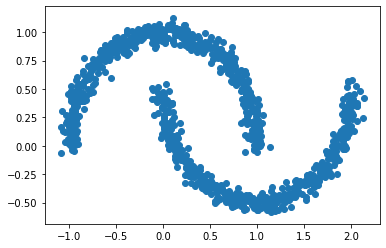

In [27]:
plt.scatter(X[:, 0], X[:, 1]);

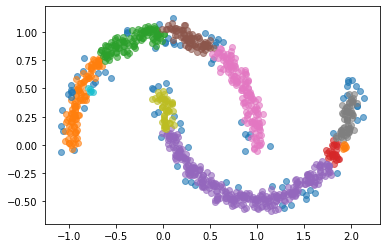

In [28]:
for i in range(-1, 13):
    plt.scatter(
        X[dbscan.labels_ == i, 0], X[dbscan.labels_ == i, 1], alpha=0.6)

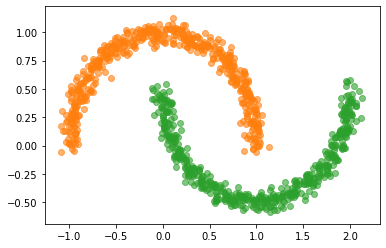

In [29]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

for i in range(-1, 13):
    plt.scatter(
        X[dbscan.labels_ == i, 0], X[dbscan.labels_ == i, 1], alpha=0.6)

### Gaussian Mixtures

In [4]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [5]:
gm.weights_

array([0.20791669, 0.59269956, 0.19938375])

In [6]:
gm.means_

array([[-0.73769531,  0.5617276 ],
       [ 0.51193446,  0.24274787],
       [ 1.76032627, -0.04976826]])

In [7]:
gm.covariances_

array([[[ 0.05792746,  0.06396956],
        [ 0.06396956,  0.08640363]],

       [[ 0.17140806, -0.10276506],
        [-0.10276506,  0.28724275]],

       [[ 0.05036847,  0.05935092],
        [ 0.05935092,  0.0867279 ]]])

In [8]:
gm.converged_, gm.n_iter_

(True, 17)

In [10]:
preds = gm.predict(X)

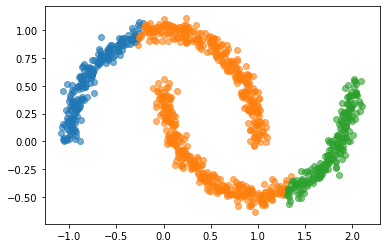

In [12]:
for i in [0, 1, 2]:
    plt.scatter(
        X[preds == i, 0], X[preds == i, 1], alpha=0.6)

In [17]:
probs = gm.predict_proba(X)

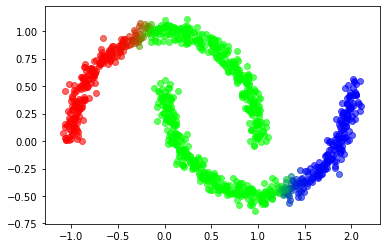

In [18]:
for i in range(X.shape[0]):
    plt.scatter(
        X[i, 0], 
        X[i, 1], 
        color=[probs[i, 0], probs[i, 1], probs[i, 2], 0.6])

In [19]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.1726759 ,  1.09482879],
       [ 0.45602231, -0.55648728],
       [-0.03375065, -0.41743279],
       [ 1.55223342, -0.3048445 ],
       [ 2.21962277,  0.64010266],
       [ 1.86819297,  0.03931701]])

In [20]:
y_new

array([1, 1, 1, 2, 2, 2])

In [22]:
# log of prob density at ea. location: higher value = more dense region
gm.score_samples(X)[:10]

array([-1.94876229, -0.08623872, -1.49569212, -1.98391825, -0.40924569,
       -0.37746764, -0.77094062, -1.67657121, -1.68251259, -0.4787318 ])